# ACM Digital Library bibliometric analysis of "legacy"

[Search "legacy" at ACM Digital Library](http://dl.acm.org/results.cfm?query=legacy&filtered=acmPubGroups%2EacmPubGroup=Proceeding&within=owners%2Eowner%3DHOSTED&dte=&bfr=&srt=%5Fscore). Just a simple search.

In [233]:
import pandas as pd
import networkx as nx
import itertools
import matplotlib.pyplot as plt
import re
%matplotlib inline

## Data

A CSV downloaded from ACM DL, in default sorting order of the library's own idea of relevance... whatever that means for them. BibTeX is also available.

In [128]:
legacybib = pd.read_csv("ACMDL2016110912244225.csv")

Massage the keywords to be lists.

In [129]:
legacybib.keywords = legacybib.keywords.map(lambda l: [k.lower().strip() for k in l.split(',')], na_action='ignore')

In [130]:
print(legacybib.columns)
print(len(legacybib))

Index(['type', 'id', 'author', 'editor', 'advisor', 'note', 'title', 'pages',
       'article_no', 'num_pages', 'keywords', 'doi', 'journal', 'issue_date',
       'volume', 'issue_no', 'description', 'month', 'year', 'issn',
       'booktitle', 'acronym', 'edition', 'isbn', 'conf_loc', 'publisher',
       'publisher_loc'],
      dtype='object')
1114


## Data exploration

### Histogram of publication years

Would be nice to normalize this against ACL background.

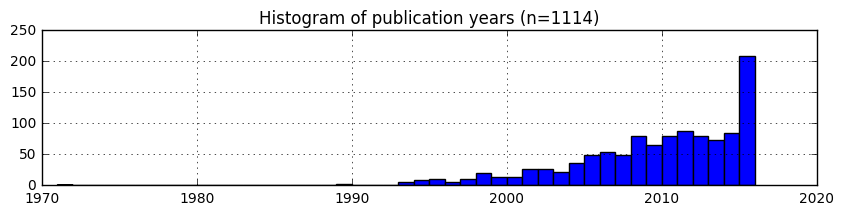

In [121]:
legacybib.year.hist(bins=legacybib.year.max() - legacybib.year.min())
plt.title("Histogram of publication years (n=" + str(legacybib.year.size) + ")")

## A histogram of keywords

In [229]:
keywordhist = {}
for kws in legacybib.keywords.dropna():
    for k in kws:
        if k in keywordhist:
            keywordhist[k] = keywordhist[k] + 1
        else:
            keywordhist[k] = 1

In [230]:
for k in sorted(keywordhist, key=keywordhist.get, reverse=True)[:20]:
    print(k, keywordhist[k])

reverse engineering 24
security 23
java 22
legacy software 18
refactoring 18
legacy systems 17
migration 15
cloud computing 15
virtualization 14
software engineering 13
reengineering 13
design 12
interoperability 11
legacy 10
software architecture 10
multimedia 10
software evolution 10
transactional memory 10
soa 10
compilers 9


Legacy keywords.

In [316]:
[(k, keywordhist[k]) for k in keywordhist if re.match("legacy", k)]

[('legacy software', 18),
 ('legacy traffic', 2),
 ('legacy system integration', 1),
 ('legacy applications', 1),
 ('legacy system analysis', 1),
 ('legacy integration', 2),
 ('legacy data', 2),
 ('legacy file formats', 1),
 ('legacy reuse', 2),
 ('legacy support', 1),
 ('legacy', 10),
 ('legacy code wrapping', 1),
 ('legacy migration', 1),
 ('legacy systems', 17),
 ('legacy devices', 1),
 ('legacy networks', 1),
 ('legacy software product lines', 1),
 ('legacy document conversion', 1),
 ('legacy contact', 1),
 ('legacy information systems', 1),
 ('legacy modernization', 3),
 ('legacy bias', 1),
 ('legacy code', 4),
 ('legacy technology', 1),
 ('legacy programs', 2),
 ('legacy system', 7),
 ('legacy assets mining', 1),
 ('legacy infrastructure', 2)]

## A graph of keywords

Keywords are a comma separated list in `keywords`, let's pull all of them out to a graph.

An analysis of which keywords are actually plentiful, their temporal distibution etc. centrality metrics, subgraph overlap etc. would be great.

In [135]:
keywordg = nx.Graph()
legacybib.keywords.map(lambda item: keywordg.add_edges_from([p for p in itertools.permutations(item, 2)]), na_action='ignore')
print("Number of components", len([comp for comp in nx.connected_components(keywordg)]))
print("Largest ten components sizes", sorted([len(comp) for comp in nx.connected_components(keywordg)], reverse=True)[:10])

Number of components 193
Largest ten components sizes [1975, 13, 12, 12, 9, 9, 9, 8, 8, 8]


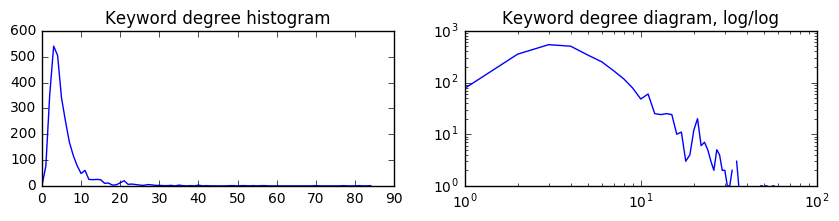

In [136]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(10, 2)
ax1.set_title("Keyword degree histogram")
ax1.plot(nx.degree_histogram(keywordg))
ax2.set_title("Keyword degree diagram, log/log")
ax2.loglog(nx.degree_histogram(keywordg))

In [359]:
plt.rcParams["figure.figsize"] = (10, 10)
def plotGraph(graph, keyword, color = "green"):
    subgraph = graph.subgraph(graph.neighbors(keyword) + [keyword])
    plt.title("Neighbourhood of " + keyword + " (" + str(len(subgraph)) + ")")
    plt.axis('off')
    nx.draw_networkx(subgraph,
                     font_size = 7,
                     node_color = color,
                     alpha = 0.5,
                     edge_color = "light" + color)

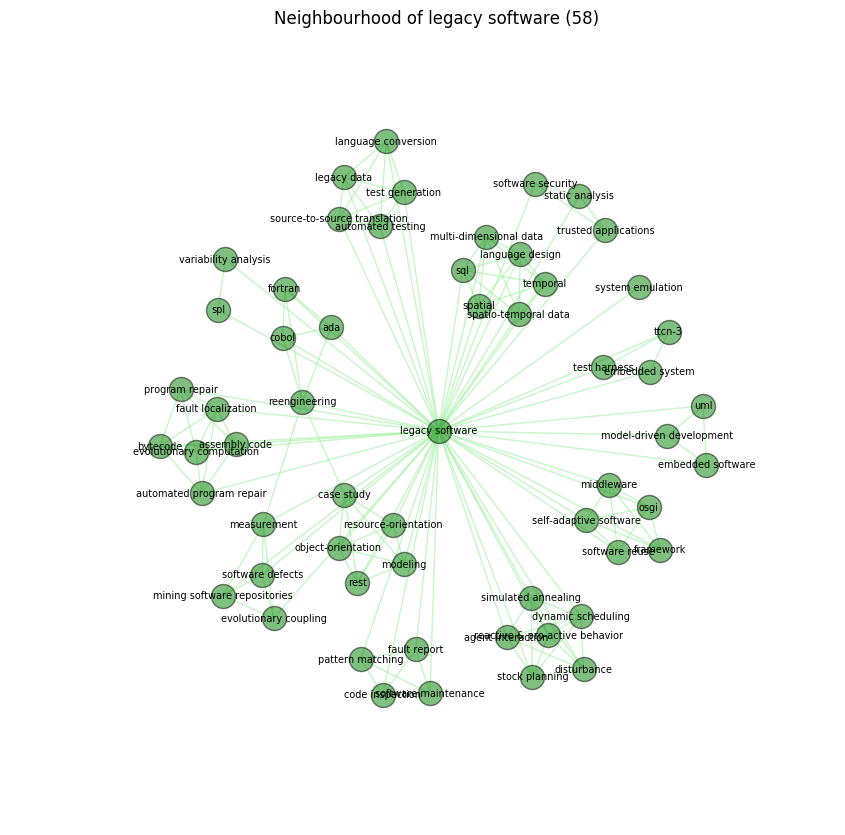

In [360]:
plotGraph(keywordg, "legacy software")

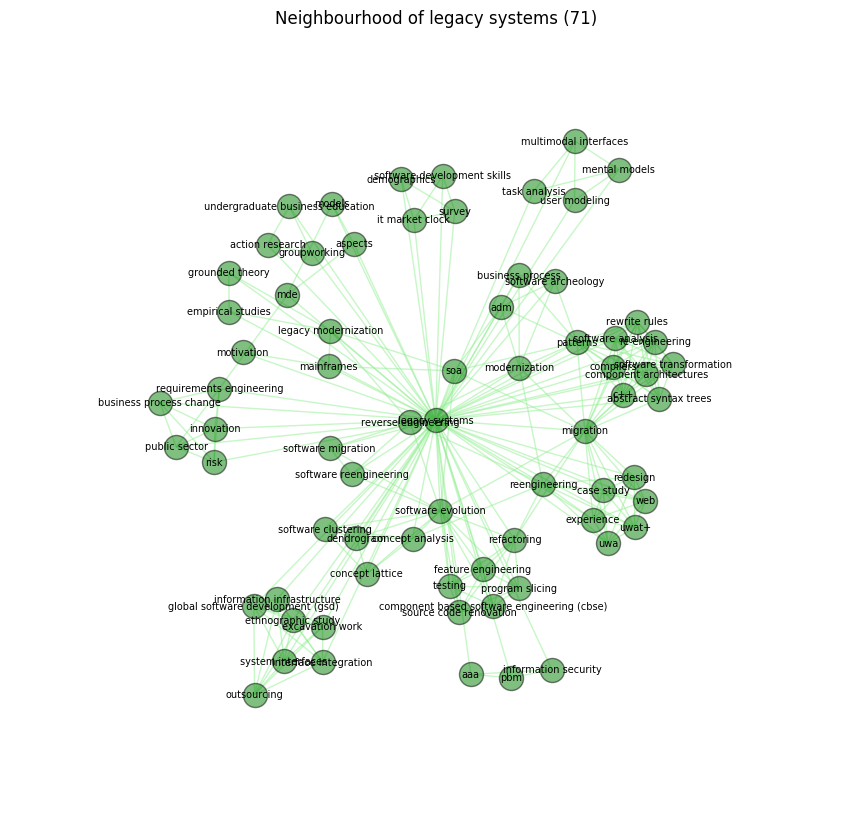

In [361]:
plotGraph(keywordg, "legacy systems")